<h1> A Tale of Two Cities</h1>
<i> Comparison of Tipping Behavior in New York and Chicago Taxi Rides</i>
<h4> Group Members:</h4> 
    
- Swathi Bhat
- Jocelyn Ambrocio

## Executive Summary 

<p> This project sought data-driven insights on tipping behaviour in New York and Chicago on two festive periods: Christmas and New Year's. The project focused on the relationship between tipping and factors such as distance of travel and time of the day, that were independent of a driver's traits, with the aim of deriving insights that were transferable across the transportation sector where tipping was involved.</p> 
<p> We extracted our datasets from a larger public database maintained by the City of New York and Chicago.</p> 
<p> Our methodology involved data wrangling and pre-processing, applying visualisation to display patterns and applying linear regression to derive an equation.</p> 
<p> The data revealed interesting insights: The tip (relative to the fare) decreases as a passenger travels further in the taxi, across both the cities. A higher percentage of tips is given between evening to midnight in New York and Chicago. It was ntocieable that majority of Chicago riders did not give any tip at all especially during the early part of the day. New Year is a better period for tipping than Christmas in both cities.</p>

## Problem Statement and Datasets

<h4><b><u>Research Topic</b></u></h4>

<p>The project is based on the transportation industry, with a specific focus on tipping behavior in taxi rides in New York and Chicago on two specific days in 2018: Christmas and New Year’s. </p>


<p> Tipping is a social norm in many countries. In certain industries such as hospitality and food & beverage, tipping tends to be an expectation and not just a customer's choice. Notably, in several countries, tipping is also expected at the end of a taxi trip. In the United States, <a href = "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5464625/">the norm of tipping taxi drivers is between 15 and 20 percent</a>, with tipping representing a significant portion of the informal economy. However, only a handful of studies have been dedicated in analysing the tipping behaviour in taxis. </p>
<p> In this project, we are not exploring patterns influencing tipping that are dependent on driver's personality traits such as affability. Instead, we are interested in specifically studying factors which influence tipping that are independent of such traits. Examples of these factors include: the distance travelled and timing of pick-up. Understanding, and subsequently predicting, tipping behaviour modelled on such factors may assist taxi drivers in making better decisions about the characteristics of a ride that may yield a better tip. By understanding tipping behaviour influenced by factors that are driver-independent, this analysis is applicable not only to taxi drivers but drivers of other ride-sharing services such as GoJek and Grab.</p>


<p>For this project, we will analyse the following:</p>
    
- 1.1 Whether the tip amount increases with trip distance.
- 1.2 Whether the tip amount differs based on the pick-up time.
- 1.3 Whether people tip better on Christmas than on New Year’s.

<p>After analysing the data for each of the cities, we will compare the data across the two cities to analyse the following:</p>
    
- 2.1 By how much does tipping differ by distance in New York compared with Chicago?
- 2.2 By how much does tipping differ by pick-up time in New York compared with Chicago?
- 2.3 By how much does tipping differ by (Christmas or New Year's) day in New York compared with Chicago?

<h4><b><u>Selected Datasets</b><u></h4>

<p>We picked a dataset containing taxi trips taken from 24 - 25 December 2018 and 31 December 2018 to 1 January 2019. The data was extracted from a bigger dataset that was reported to regulatory authorities in New York and Chicago. The features of the dataset are as follows:</p> 

<table>
    <tr>
        <th>Information</th>
        <th>New York</th>
        <th>Chicago</th>
    </tr>
    <tr>
        <td>Number of variables</td>
        <td>17</td>
        <td>21</td>
    </tr>
    <tr>
        <td>Number of datapoints</td>
        <td>520,638</td>
        <td>683,793</td>
    </tr>
        <tr>
        <td>Variables</td>
        <td>VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount</td>
        <td>Trip ID, Trip Start Timestamp, Trip End Timestamp, Trip Seconds, Trip Miles, Pickup Census Tract, Dropoff Census Tract, Pickup Community Area, Dropoff Community Area, Fare, Tip, Additional Charges, Trip Total, Shared Trip Authorized, Trips Pooled, Pickup Centroid Latitude, Pickup Centroid Longitude, Pickup Centroid Location, Dropoff Centroid Latitude, Dropoff Centroid Longitude, Dropoff Centroid Location</td>
    </tr>
</table>

<p>This dataset was selected because of the number of datapoints that were available to perform a rigorous statistical analysis.</p> 

<p> Our datasets are downloadable from this Google Drive link <a href ="https://drive.google.com/drive/folders/1PyKpRTGw3Hd2GbeOVRahwTclM201Bn8b?usp=sharing">here.</a></p>

<h4><b><u>Structure of the dataset</b><u></h4>

<p>Dataset in CSV fromat was available on public databases maintained by the <a href="https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p"> City of Chicago</a> and the <a href="https://data.cityofnewyork.us/Transportation/2018-Yellow-Taxi-Trip-Data/t29m-gskq">City of New York</a>.  The relevant datasets were  retrieved from the websites using their filter and export function.</p> 


## Methodology 

The following steps were employed in analysing both New York and Chicago datasets:
- Step 1: Data Cleaning 
- Step 2: Deletion of Irrelevant Variables / Addition of Relevant Variables
- Step 3: Exploratory Data Analysis (descriptive analysis and visualisation tools)
- Step 4: Simple Linear Regression

## <u>New York City</u> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
import time 
from datetime import datetime

### Step 1: Reading and cleaning the dataset

In [2]:
nyc_df = pd.read_csv('NYC_Taxi_Trips.csv')

print(nyc_df.shape)
nyc_df.head()

(520638, 17)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,01/01/2019 02:44:59 PM,01/01/2019 09:58:48 PM,6,3.04,1,N,186,141,1,12.5,0.5,0.5,2.76,0.0,0.3,16.56
1,2,01/01/2019 02:26:08 PM,01/01/2019 02:28:36 PM,6,0.72,1,N,148,79,1,4.5,0.5,0.5,1.45,0.0,0.3,7.25
2,2,01/01/2019 02:15:09 PM,01/01/2019 02:21:27 PM,6,0.80,1,N,79,148,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76
3,2,01/01/2019 01:59:16 PM,01/01/2019 02:08:11 PM,6,1.51,1,N,68,233,1,8.0,0.5,0.5,2.00,0.0,0.3,11.30
4,2,01/01/2019 04:49:40 AM,01/01/2019 04:57:28 AM,1,1.22,1,N,137,4,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80


In [3]:
counts = nyc_df.isnull().sum()
missing_counts = pd.Series(counts)
missing_counts

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [4]:
# extracting only the relevant columns
relevant_nyc_df = nyc_df.loc[:, ['tpep_pickup_datetime', 
                                 'tpep_dropoff_datetime', 
                                 'passenger_count', 
                                 'trip_distance', 
                                'PULocationID', 
                                 'DOLocationID',
                                 'fare_amount', 
                                 'extra', 
                                 'mta_tax', 
                                 'tip_amount', 
                                 'tolls_amount', 
                                 'improvement_surcharge', 
                                 'total_amount']]

print(relevant_nyc_df.shape)
relevant_nyc_df.head()


(520638, 13)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,01/01/2019 02:44:59 PM,01/01/2019 09:58:48 PM,6,3.04,186,141,12.5,0.5,0.5,2.76,0.0,0.3,16.56
1,01/01/2019 02:26:08 PM,01/01/2019 02:28:36 PM,6,0.72,148,79,4.5,0.5,0.5,1.45,0.0,0.3,7.25
2,01/01/2019 02:15:09 PM,01/01/2019 02:21:27 PM,6,0.80,79,148,6.0,0.5,0.5,1.46,0.0,0.3,8.76
3,01/01/2019 01:59:16 PM,01/01/2019 02:08:11 PM,6,1.51,68,233,8.0,0.5,0.5,2.00,0.0,0.3,11.30
4,01/01/2019 04:49:40 AM,01/01/2019 04:57:28 AM,1,1.22,137,4,7.0,0.0,0.5,0.00,0.0,0.3,7.80


In [5]:
# calculating duration from timestamps

def time_converter(x):
    new_x =  pd.to_datetime(x)
    return datetime.timestamp(new_x)

pickup_time = relevant_nyc_df['tpep_pickup_datetime'].apply(time_converter)
dropoff_time = relevant_nyc_df['tpep_dropoff_datetime'].apply(time_converter)
relevant_nyc_df['pickup_time'] = pickup_time
relevant_nyc_df['dropoff_time'] = dropoff_time
relevant_nyc_df['trip_duration'] = relevant_nyc_df['dropoff_time'] - relevant_nyc_df['pickup_time']

relevant_nyc_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_time,dropoff_time,trip_duration
0,01/01/2019 02:44:59 PM,01/01/2019 09:58:48 PM,6,3.04,186,141,12.5,0.5,0.5,2.76,0.0,0.3,16.56,1.546325e+09,1.546351e+09,26029.0
1,01/01/2019 02:26:08 PM,01/01/2019 02:28:36 PM,6,0.72,148,79,4.5,0.5,0.5,1.45,0.0,0.3,7.25,1.546324e+09,1.546324e+09,148.0
2,01/01/2019 02:15:09 PM,01/01/2019 02:21:27 PM,6,0.80,79,148,6.0,0.5,0.5,1.46,0.0,0.3,8.76,1.546323e+09,1.546324e+09,378.0
3,01/01/2019 01:59:16 PM,01/01/2019 02:08:11 PM,6,1.51,68,233,8.0,0.5,0.5,2.00,0.0,0.3,11.30,1.546322e+09,1.546323e+09,535.0
4,01/01/2019 04:49:40 AM,01/01/2019 04:57:28 AM,1,1.22,137,4,7.0,0.0,0.5,0.00,0.0,0.3,7.80,1.546289e+09,1.546290e+09,468.0


In [7]:
# removing trips with duration less than 60 seconds
time_cond = relevant_nyc_df['trip_duration'] >= 60
# removing trips that travelled no distance 
dist_cond = relevant_nyc_df['trip_distance'] > 0
# removing trips with no fares 
fare_cond = relevant_nyc_df['fare_amount'] > 0 
# removing trips with negative tip amount
tip_cond = relevant_nyc_df['tip_amount'] >=0
# applying the conditions 
relevant_nyc_df = relevant_nyc_df[time_cond & dist_cond & fare_cond & tip_cond]
# testing 
print(relevant_nyc_df.shape)
relevant_nyc_df.head()

(513735, 16)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_time,dropoff_time,trip_duration
0,01/01/2019 02:44:59 PM,01/01/2019 09:58:48 PM,6,3.04,186,141,12.5,0.5,0.5,2.76,0.0,0.3,16.56,1.546325e+09,1.546351e+09,26029.0
1,01/01/2019 02:26:08 PM,01/01/2019 02:28:36 PM,6,0.72,148,79,4.5,0.5,0.5,1.45,0.0,0.3,7.25,1.546324e+09,1.546324e+09,148.0
2,01/01/2019 02:15:09 PM,01/01/2019 02:21:27 PM,6,0.80,79,148,6.0,0.5,0.5,1.46,0.0,0.3,8.76,1.546323e+09,1.546324e+09,378.0
3,01/01/2019 01:59:16 PM,01/01/2019 02:08:11 PM,6,1.51,68,233,8.0,0.5,0.5,2.00,0.0,0.3,11.30,1.546322e+09,1.546323e+09,535.0
4,01/01/2019 04:49:40 AM,01/01/2019 04:57:28 AM,1,1.22,137,4,7.0,0.0,0.5,0.00,0.0,0.3,7.80,1.546289e+09,1.546290e+09,468.0


In [8]:
# checking datatype of datetime 
relevant_nyc_df['tpep_pickup_datetime'].dtype
relevant_nyc_df['tpep_dropoff_datetime'].dtype

# extracting only the date 
def day_identity(date):
    if ('01/01/2019' in date) or ('12/31/2018' in date) or ('01/02/2019' in date):
        return 'New Year'
    else:
        return 'Christmas'
    
# applying to pickup and dropoff datetime
trip_day = relevant_nyc_df['tpep_pickup_datetime'].apply(day_identity)
relevant_nyc_df['trip_day'] = trip_day

# testing 
print(relevant_nyc_df.shape)
relevant_nyc_df.tail()

(513735, 17)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_time,dropoff_time,trip_duration,trip_day
520633,12/24/2018 12:00:05 AM,12/24/2018 12:09:05 AM,1,2.40,239,75,9.5,0.5,0.5,3.2,0.0,0.3,14.0,1.545581e+09,1.545581e+09,540.0,Christmas
520634,12/24/2018 12:00:05 AM,12/24/2018 12:15:45 AM,1,1.78,100,233,12.0,0.5,0.5,0.0,0.0,0.3,13.3,1.545581e+09,1.545582e+09,940.0,Christmas
520635,12/24/2018 12:00:00 AM,12/24/2018 11:51:39 PM,5,1.66,75,264,7.0,0.5,0.5,0.0,0.0,0.3,8.3,1.545581e+09,1.545667e+09,85899.0,Christmas
520636,12/24/2018 12:00:00 AM,12/24/2018 07:07:24 PM,1,6.16,163,264,35.5,1.0,0.0,0.0,0.0,0.3,36.8,1.545581e+09,1.545650e+09,68844.0,Christmas
520637,12/24/2018 12:00:00 AM,12/24/2018 12:09:14 AM,1,1.90,234,144,8.5,0.5,0.5,1.0,0.0,0.3,10.8,1.545581e+09,1.545581e+09,554.0,Christmas


In [9]:
christmas_df = relevant_nyc_df[relevant_nyc_df['trip_day'] == 'Christmas'].copy()
print(christmas_df.shape)
ny_df = relevant_nyc_df[relevant_nyc_df['trip_day'] == 'New Year'].copy()
print(ny_df.shape)

(307047, 17)
(206688, 17)


In [10]:
# grouping timings into 4-hour categories 
timestamp_xmas_list = ['12/24/2018 12:00:00 AM','12/24/2018 4:00:00 AM','12/24/2018 8:00:00 AM',
                  '12/24/2018 12:00:00 PM',
                  '12/24/2018 4:00:00 PM',
                  '12/24/2018 8:00:00 PM',
                  '12/25/2018 12:00:00 AM',
                  '12/25/2018 4:00:00 AM',
                  '12/25/2018 8:00:00 AM',
                  '12/25/2018 12:00:00 PM',
                  '12/25/2018 4:00:00 PM',
                  '12/25/2018 8:00:00 PM',
                  '12/26/2018 12:00:00 AM',
                  '12/26/2018 4:00:00 AM',
                  '12/26/2018 8:00:00 AM',
                  '12/26/2018 12:00:00 PM',
                  '12/26/2018 4:00:00 PM',
                  '12/26/2018 8:00:00 PM',
                  '12/26/2018 11:59:59 PM']
timestamp_ny_list = ['12/31/2018 12:00:00 AM',
                  '12/31/2018 4:00:00 AM',
                  '12/31/2018 8:00:00 AM',
                  '12/31/2018 12:00:00 PM',
                  '12/31/2018 4:00:00 PM',
                  '12/31/2018 8:00:00 PM',
                  '01/01/2019 12:00:00 AM',
                  '01/01/2019 4:00:00 AM',
                  '01/01/2019 8:00:00 AM',
                  '01/01/2019 12:00:00 PM',
                  '01/01/2019 4:00:00 PM',
                  '01/01/2019 8:00:00 PM',
                  '01/02/2019 12:00:00 AM',
                  '01/02/2019 4:00:00 AM',
                  '01/02/2019 8:00:00 AM',
                  '01/02/2019 12:00:00 PM',
                  '01/02/2019 4:00:00 PM',
                  '01/02/2019 8:00:00 PM',
                  '01/02/2019 11:59:59 PM']
# converting into datetime 
time_xmas_list = []
for item in timestamp_xmas_list:
    new_item = pd.to_datetime(item)
    time_xmas_list.append(datetime.timestamp(new_item))
time_xmas_list

time_ny_list = []
for i in timestamp_ny_list:
    new_i = pd.to_datetime(i)
    time_ny_list.append(datetime.timestamp(new_i))
time_ny_list

time_df = pd.DataFrame(data = {'xmas_date_time': timestamp_xmas_list,
            'xmas_time_seconds': time_xmas_list,
                              'ny_date_time': timestamp_ny_list, 
                              'ny_time_seconds': time_ny_list})

# function to assign time-groups 
def time_groups_xmas(t):
    if (time_xmas_list[0] <= t < time_xmas_list[1]) or (time_xmas_list[6] <= t < time_xmas_list[7]) or (time_xmas_list[12] <= t < time_xmas_list[13]):
        return 1
    elif (time_xmas_list[1] <= t < time_xmas_list[2]) or (time_xmas_list[7] <= t < time_xmas_list[8]) or (time_xmas_list[13] <= t < time_xmas_list[14]):
        return 2
    elif (time_xmas_list[2] <= t < time_xmas_list[3]) or (time_xmas_list[8] <= t < time_xmas_list[9]) or (time_xmas_list[14] <= t < time_xmas_list[15]):
        return 3
    elif (time_xmas_list[3] <= t < time_xmas_list[4]) or (time_xmas_list[9] <= t < time_xmas_list[10]) or (time_xmas_list[15] <= t < time_xmas_list[16]):
        return 4
    elif (time_xmas_list[4] <= t < time_xmas_list[5]) or (time_xmas_list[10] <= t < time_xmas_list[11]) or (time_xmas_list[16] <= t < time_xmas_list[17]):
        return 5
    elif (time_xmas_list[5] <= t < time_xmas_list[6]) or (time_xmas_list[11] <= t < time_xmas_list[12]) or (time_xmas_list[17] <= t < time_xmas_list[18]):
        return 6
    
def time_groups_ny(t):
    if (time_ny_list[0] <= t < time_ny_list[1]) or (time_ny_list[6] <= t < time_ny_list[7]) or (time_ny_list[12] <= t < time_ny_list[13]):
        return 1
    elif (time_ny_list[1] <= t < time_ny_list[2]) or (time_ny_list[7] <= t < time_ny_list[8]) or (time_ny_list[13] <= t < time_ny_list[14]):
        return 2
    elif (time_ny_list[2] <= t < time_ny_list[3]) or (time_ny_list[8] <= t < time_ny_list[9]) or (time_ny_list[14] <= t < time_ny_list[15]):
        return 3
    elif (time_ny_list[3] <= t < time_ny_list[4]) or (time_ny_list[9] <= t < time_ny_list[10]) or (time_ny_list[15] <= t < time_ny_list[16]):
        return 4
    elif (time_ny_list[4] <= t < time_ny_list[5]) or (time_ny_list[10] <= t < time_ny_list[11]) or (time_ny_list[16] <= t < time_ny_list[17]):
        return 5
    elif (time_ny_list[5] <= t < time_ny_list[6]) or (time_ny_list[11] <= t < time_ny_list[12]) or (time_ny_list[17] <= t < time_ny_list[18]):
        return 6
time_df

,xmas_date_time,xmas_time_seconds,ny_date_time,ny_time_seconds
0,12/24/2018 12:00:00 AM,1.545581e+09,12/31/2018 12:00:00 AM,1.546186e+09
1,12/24/2018 4:00:00 AM,1.545595e+09,12/31/2018 4:00:00 AM,1.546200e+09
2,12/24/2018 8:00:00 AM,1.545610e+09,12/31/2018 8:00:00 AM,1.546214e+09
3,12/24/2018 12:00:00 PM,1.545624e+09,12/31/2018 12:00:00 PM,1.546229e+09
4,12/24/2018 4:00:00 PM,1.545638e+09,12/31/2018 4:00:00 PM,1.546243e+09
5,12/24/2018 8:00:00 PM,1.545653e+09,12/31/2018 8:00:00 PM,1.546258e+09
6,12/25/2018 12:00:00 AM,1.545667e+09,01/01/2019 12:00:00 AM,1.546272e+09
7,12/25/2018 4:00:00 AM,1.545682e+09,01/01/2019 4:00:00 AM,1.546286e+09
8,12/25/2018 8:00:00 AM,1.545696e+09,01/01/2019 8:00:00 AM,1.546301e+09
9,12/25/2018 12:00:00 PM,1.545710e+09,01/01/2019 12:00:00 PM,1.546315e+09


In [11]:
# Grouping times on Christmas
time_group = christmas_df['pickup_time'].apply(time_groups_xmas)
christmas_df['time_group'] = time_group
christmas_df.head()

# Grouping times on NY
time_group_ny = ny_df['pickup_time'].apply(time_groups_ny)
ny_df['time_group'] = time_group_ny
ny_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_time,dropoff_time,trip_duration,trip_day,time_group
0,01/01/2019 02:44:59 PM,01/01/2019 09:58:48 PM,6,3.04,186,141,12.5,0.5,0.5,2.76,0.0,0.3,16.56,1.546325e+09,1.546351e+09,26029.0,New Year,4
1,01/01/2019 02:26:08 PM,01/01/2019 02:28:36 PM,6,0.72,148,79,4.5,0.5,0.5,1.45,0.0,0.3,7.25,1.546324e+09,1.546324e+09,148.0,New Year,4
2,01/01/2019 02:15:09 PM,01/01/2019 02:21:27 PM,6,0.80,79,148,6.0,0.5,0.5,1.46,0.0,0.3,8.76,1.546323e+09,1.546324e+09,378.0,New Year,4
3,01/01/2019 01:59:16 PM,01/01/2019 02:08:11 PM,6,1.51,68,233,8.0,0.5,0.5,2.00,0.0,0.3,11.30,1.546322e+09,1.546323e+09,535.0,New Year,4
4,01/01/2019 04:49:40 AM,01/01/2019 04:57:28 AM,1,1.22,137,4,7.0,0.0,0.5,0.00,0.0,0.3,7.80,1.546289e+09,1.546290e+09,468.0,New Year,2


In [12]:
all_nyc_df = pd.concat([christmas_df, ny_df], ignore_index=False)
# testing 
print(all_nyc_df.shape)
all_nyc_df.head()

(513735, 18)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_time,dropoff_time,trip_duration,trip_day,time_group
209500,12/26/2018 12:00:00 AM,12/26/2018 12:13:46 AM,3,3.29,237,90,13.0,0.5,0.5,2.86,0.0,0.3,17.16,1.545754e+09,1.545754e+09,826.0,Christmas,1
209501,12/26/2018 12:00:00 AM,12/26/2018 12:06:27 AM,1,3.30,264,264,11.0,0.5,0.5,2.00,0.0,0.3,14.30,1.545754e+09,1.545754e+09,387.0,Christmas,1
209502,12/26/2018 12:00:00 AM,12/26/2018 06:00:24 PM,1,0.97,237,162,10.0,1.0,0.5,0.00,0.0,0.3,11.80,1.545754e+09,1.545818e+09,64824.0,Christmas,1
209503,12/26/2018 12:00:00 AM,12/26/2018 12:13:30 AM,1,2.08,249,4,11.0,0.5,0.5,2.46,0.0,0.3,14.76,1.545754e+09,1.545754e+09,810.0,Christmas,1
209504,12/25/2018 11:59:59 PM,12/26/2018 12:31:38 AM,2,3.10,87,144,21.0,0.5,0.5,0.00,0.0,0.3,22.30,1.545754e+09,1.545755e+09,1899.0,Christmas,6


In [13]:
# rounding off tip amounts for visualisation 
def tip_round(tip):
    return round(tip)

tip_rounded = all_nyc_df['tip_amount'].apply(tip_round)
all_nyc_df['tip_rounded'] = tip_rounded
all_nyc_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_time,dropoff_time,trip_duration,trip_day,time_group,tip_rounded
209500,12/26/2018 12:00:00 AM,12/26/2018 12:13:46 AM,3,3.29,237,90,13.0,0.5,0.5,2.86,0.0,0.3,17.16,1.545754e+09,1.545754e+09,826.0,Christmas,1,3
209501,12/26/2018 12:00:00 AM,12/26/2018 12:06:27 AM,1,3.30,264,264,11.0,0.5,0.5,2.00,0.0,0.3,14.30,1.545754e+09,1.545754e+09,387.0,Christmas,1,2
209502,12/26/2018 12:00:00 AM,12/26/2018 06:00:24 PM,1,0.97,237,162,10.0,1.0,0.5,0.00,0.0,0.3,11.80,1.545754e+09,1.545818e+09,64824.0,Christmas,1,0
209503,12/26/2018 12:00:00 AM,12/26/2018 12:13:30 AM,1,2.08,249,4,11.0,0.5,0.5,2.46,0.0,0.3,14.76,1.545754e+09,1.545754e+09,810.0,Christmas,1,2
209504,12/25/2018 11:59:59 PM,12/26/2018 12:31:38 AM,2,3.10,87,144,21.0,0.5,0.5,0.00,0.0,0.3,22.30,1.545754e+09,1.545755e+09,1899.0,Christmas,6,0


In [14]:
# intervals for distance travelled 
print(all_nyc_df['trip_distance'].describe())
def distance_travel(distance):
    if distance>=100:
        return 100
    elif distance>=90:
        return 90
    elif distance>=80:
        return 80
    elif distance>=70:
        return 70
    elif distance>=60:
        return 60
    elif distance>=50:
        return 50
    elif distance>=40:
        return 40
    elif distance>=30:
        return 30
    elif distance>=20:
        return 20
    else:
        return 10

all_nyc_df["distance_travelled"] = all_nyc_df["trip_distance"].apply(distance_travel)
all_nyc_df.head()

count    513735.000000
mean          2.906572
std           3.808252
min           0.010000
25%           0.910000
50%           1.600000
75%           3.000000
max          83.050000
Name: trip_distance, dtype: float64


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_time,dropoff_time,trip_duration,trip_day,time_group,tip_rounded,distance_travelled
209500,12/26/2018 12:00:00 AM,12/26/2018 12:13:46 AM,3,3.29,237,90,13.0,0.5,0.5,2.86,0.0,0.3,17.16,1.545754e+09,1.545754e+09,826.0,Christmas,1,3,10
209501,12/26/2018 12:00:00 AM,12/26/2018 12:06:27 AM,1,3.30,264,264,11.0,0.5,0.5,2.00,0.0,0.3,14.30,1.545754e+09,1.545754e+09,387.0,Christmas,1,2,10
209502,12/26/2018 12:00:00 AM,12/26/2018 06:00:24 PM,1,0.97,237,162,10.0,1.0,0.5,0.00,0.0,0.3,11.80,1.545754e+09,1.545818e+09,64824.0,Christmas,1,0,10
209503,12/26/2018 12:00:00 AM,12/26/2018 12:13:30 AM,1,2.08,249,4,11.0,0.5,0.5,2.46,0.0,0.3,14.76,1.545754e+09,1.545754e+09,810.0,Christmas,1,2,10
209504,12/25/2018 11:59:59 PM,12/26/2018 12:31:38 AM,2,3.10,87,144,21.0,0.5,0.5,0.00,0.0,0.3,22.30,1.545754e+09,1.545755e+09,1899.0,Christmas,6,0,10


### Step 2: Exploratory Data Analysis
### Investigating the hypotheses

In [17]:
# Proportion of trips based on amount of tips
pd.set_option('precision', 3)
tips_gb = all_nyc_df.groupby('tip_rounded')
tips_gb.size()
total_size = len(all_nyc_df.index)
prop_tips = (tips_gb.size()/total_size)


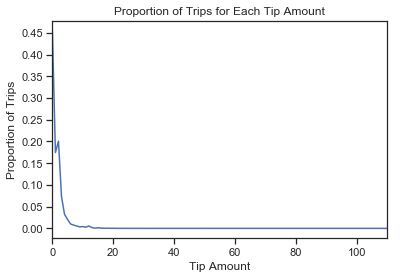

The average tip amount in NYC is:  1.4481457366150394


In [18]:
# Visualisation 
# pd.options.display.float_format = '{:,.1f}'.format
sns.set(style = "ticks")

prop_tips.plot(kind = 'line',
                  x = prop_tips.index,
                  y = prop_tips.values
                )
plt.title('Proportion of Trips for Each Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Proportion of Trips')
plt.yticks(np.arange(0.000, 0.5, 0.05))
plt.show()

print('The average tip amount in NYC is: ', all_nyc_df['tip_amount'].mean())

In [ ]:
plt.savefig('proportion_trips_tips.png')

### 2.1 Whether the tip amount increases with trip distance.

In [19]:
all_nyc_df.head(1)
# creating a tip category 
def tip_cat(tip):
    if tip == 0:
        return 'Without tip'
    else:
        return 'With tip'
all_nyc_df['tip_category'] = all_nyc_df['tip_amount'].apply(tip_cat)

# creating tip%
all_nyc_df['tip_perc'] = round((all_nyc_df['tip_amount']/all_nyc_df['fare_amount'])*100, 1)
all_nyc_df.head(1)  

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tip_amount,...,total_amount,pickup_time,dropoff_time,trip_duration,trip_day,time_group,tip_rounded,distance_travelled,tip_category,tip_perc
209500,12/26/2018 12:00:00 AM,12/26/2018 12:13:46 AM,3,3.29,237,90,13.0,0.5,0.5,2.86,...,17.16,1.546e+09,1.546e+09,826.0,Christmas,1,3,10,With tip,22.0


In [72]:
tip_dist = all_nyc_df[['tip_category', 'distance_travelled']]
tg_groupby = tip_dist.groupby(['distance_travelled','tip_category'])
tg_groupby.size()

flatten_df = tg_groupby.size().reset_index()
flatten_df.columns = ['distance_travelled', 'tip_category', 'number_trips']
flatten_df

tdt_pivot = pd.pivot_table(flatten_df, index=['distance_travelled'], columns=['tip_category'],
                                      values='number_trips', aggfunc=np.sum)
tdt_pivot.reset_index(inplace=True)
tdt_pivot.columns = ['Distance Travelled', 'With Tip', 'Without Tip']
tdt_pivot

dist_gb_size = all_nyc_df.groupby(['distance_travelled']).size().reset_index()
dist_gb_size.columns = ['distance_travelled', 'total_trips']

tdt_pivot['Total Trips'] = dist_gb_size['total_trips']
tdt_pivot['With Tip %'] = (tdt_pivot['With Tip']/tdt_pivot['Total Trips'])*100
tdt_pivot['Without Tip %'] = (tdt_pivot['Without Tip']/tdt_pivot['Total Trips'])*100
tdt_pivot

,Distance Travelled,With Tip,Without Tip,Total Trips,With Tip %,Without Tip %
0,10,280478.0,229398.0,509876,55.009,44.991
1,20,2013.0,1624.0,3637,55.348,44.652
2,30,70.0,98.0,168,41.667,58.333
3,40,11.0,28.0,39,28.205,71.795
4,50,3.0,4.0,7,42.857,57.143
5,60,2.0,4.0,6,33.333,66.667
6,70,1.0,NaN,1,100.000,NaN
7,80,NaN,1.0,1,NaN,100.000


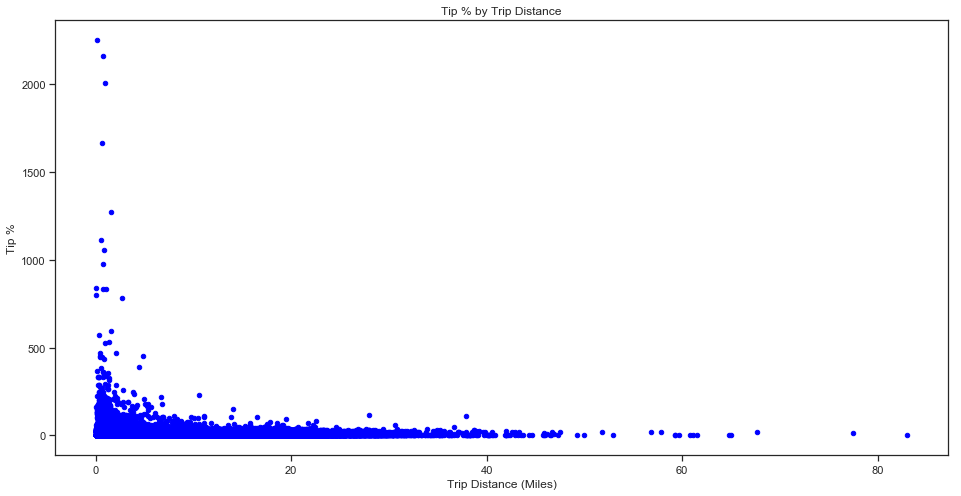

In [21]:
# tip % by trip distance
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,1,1)
all_nyc_df.plot(kind='scatter', x='trip_distance', y='tip_perc', ax=ax1, color = 'blue')
ax1.set(xlabel= 'Trip Distance (Miles)',
        ylabel='Tip %',
        title= 'Tip % by Trip Distance')
plt.show()

### 2.2 Whether the tip amount differs based on the pick-up time.

In [79]:
tip_time = all_nyc_df[['tip_category', 'time_group']]
tt_groupby = tip_time.groupby(['time_group','tip_category'])
tt_groupby.size()

tt_df = tt_groupby.size().reset_index()
tt_df.columns = ['time_group', 'tip_category', 'number_trips']
print(tt_df)

tt_pivot = pd.pivot_table(tt_df, index=['time_group'], columns=['tip_category'],
                                      values='number_trips', aggfunc=np.sum)
tt_pivot.reset_index(inplace=True)
tt_pivot.columns = ['Time Interval', 'With Tip', 'Without Tip']
tdt_pivot

tt_gb_size = all_nyc_df.groupby(['time_group']).size().reset_index()
tt_gb_size.columns = ['time_group', 'total_trips']

tt_pivot['Total Trips'] = tt_gb_size['total_trips']
tt_pivot['With Tip %'] = (tt_pivot['With Tip']/tt_pivot['Total Trips'])*100
tt_pivot['Without Tip %'] = (tt_pivot['Without Tip']/tt_pivot['Total Trips'])*100
tt_pivot


    time_group tip_category  number_trips
0            1     With tip         18519
1            1  Without tip         17056
2            2     With tip         14081
3            2  Without tip         12474
4            3     With tip         45948
5            3  Without tip         36269
6            4     With tip         72838
7            4  Without tip         59553
8            5     With tip         73349
9            5  Without tip         57945
10           6     With tip         57843
11           6  Without tip         47860


,Time Interval,With Tip,Without Tip,Total Trips,With Tip %,Without Tip %
0,1,18519,17056,35575,52.056,47.944
1,2,14081,12474,26555,53.026,46.974
2,3,45948,36269,82217,55.886,44.114
3,4,72838,59553,132391,55.017,44.983
4,5,73349,57945,131294,55.866,44.134
5,6,57843,47860,105703,54.722,45.278


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


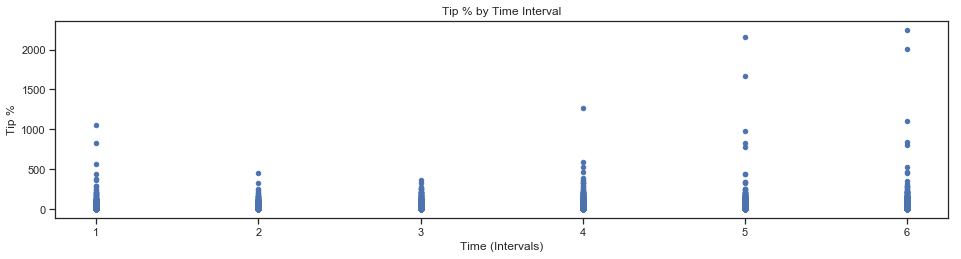

In [24]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(2,1,1)
# Tip% by time interval
all_nyc_df.plot(kind='scatter', x='time_group', y='tip_perc', ax=ax1,)
ax1.set(xlabel= 'Time (Intervals)',
        ylabel='Tip %',
        title= 'Tip % by Time Interval')
plt.show()

### 2.3 Whether people in NYC tip better on Christmas than on New Year's.

In [89]:
tip_day = all_nyc_df[['tip_category', 'trip_day']]
td_groupby = tip_day.groupby(['trip_day','tip_category'])
td_groupby.size()

td_df = td_groupby.size().reset_index()
td_df.columns = ['trip_day', 'tip_category', 'number_trips']
print(td_df)

td_pivot = pd.pivot_table(td_df, index=['trip_day'], columns=['tip_category'],
                                      values='number_trips', aggfunc=np.sum)
td_pivot.reset_index(inplace=True)
td_pivot.columns = ['Trip Day', 'With Tip', 'Without Tip']
td_pivot

td_gb_size = all_nyc_df.groupby(['trip_day']).size().reset_index()
td_gb_size.columns = ['trip_day', 'total_trips']

td_pivot['Total Trips'] = td_gb_size['total_trips']
td_pivot['With Tip %'] = (td_pivot['With Tip']/td_pivot['Total Trips'])*100
td_pivot['Without Tip %'] = (td_pivot['Without Tip']/td_pivot['Total Trips'])*100
print(td_pivot)



    trip_day tip_category  number_trips
0  Christmas     With tip        163020
1  Christmas  Without tip        144027
2   New Year     With tip        119558
3   New Year  Without tip         87130
    Trip Day  With Tip  Without Tip  Total Trips  With Tip %  Without Tip %
0  Christmas    163020       144027       307047      53.093         46.907
1   New Year    119558        87130       206688      57.845         42.155


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


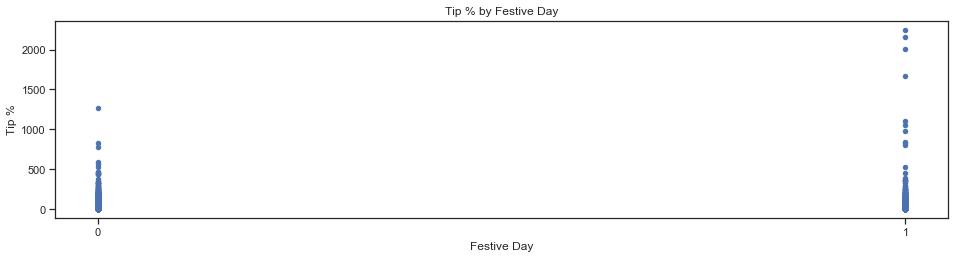

In [63]:
# visualise 

all_nyc_df['trip_day_int'] = all_nyc_df['trip_day'].map({'Christmas': 0, 'New Year': 1})
all_nyc_df.head(5)

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(2,1,1)
# tip% by Day 
all_nyc_df.plot(kind='scatter', x='trip_day_int', y='tip_perc', ax=ax1)
ax1.set(xlabel= 'Festive Day', ylabel='Tip %', title= 'Tip % by Festive Day')
ax1.set_xticks(np.arange(0, 2))
plt.show()

### 2.4 Applying linear regression to identify patterns

In [92]:
distance_regr = linear_model.LinearRegression()
X = all_nyc_df[['trip_distance']]
y = all_nyc_df[['tip_perc']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
distance_regr.fit(X_train, y_train)

print('Tip percentage = ', distance_regr.intercept_, '+', distance_regr.coef_, '* Distance')

distance_regr.predict(y_test)

fitted_values = distance_regr.predict(X_test)

print(r2_score(y_test, fitted_values))

Tip percentage =  [13.79339662] + [[-0.21699095]] * Distance
0.002399528026094222


## <u>Chicago</u>

### Step 1: Reading and cleaning the dataset

In [30]:
chicago_df = pd.read_csv('Chicago_Taxi_2018.csv')
chicago_df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,24b70255639de01a81a7f63f1d6847f3a4b9e00f,01/01/2019 02:15:00 AM,01/01/2019 02:15:00 AM,591,0.5,1.703e+10,1.703e+10,8.0,8.0,5.0,...,2.50,7.50,False,1,41.893,-87.626,POINT (-87.6262149064 41.8925077809),41.893,-87.638,POINT (-87.6378442095 41.8932163595)
1,24b708bc234f55caf3f32ed79d000b12d26c076e,01/01/2019 08:45:00 PM,01/01/2019 09:00:00 PM,851,3.9,1.703e+10,1.703e+10,43.0,69.0,5.0,...,3.62,8.62,True,2,41.754,-87.560,POINT (-87.5601889949 41.7535307093),41.769,-87.620,POINT (-87.6201776393 41.7692450579)
2,24b7200a208c98f4960706757c5dc19256272316,01/01/2019 09:30:00 AM,01/01/2019 09:30:00 AM,379,2.3,1.703e+10,1.703e+10,3.0,6.0,5.0,...,2.50,7.50,False,1,41.958,-87.653,POINT (-87.6530217894 41.9581548757),41.941,-87.671,POINT (-87.671107656 41.9414882338)
3,24b738f04f13945d5a680683185a6fe19e355e4f,01/01/2019 11:00:00 PM,01/01/2019 11:00:00 PM,448,1.7,1.703e+10,1.703e+10,3.0,4.0,5.0,...,2.55,7.55,False,1,41.958,-87.653,POINT (-87.6530217894 41.9581548757),41.965,-87.677,POINT (-87.6765780714 41.9651417087)
4,24b73f9c36f90bd52e3d6d8990fd234cd56a8f61,12/31/2018 10:45:00 AM,12/31/2018 11:15:00 AM,2139,25.1,NaN,NaN,14.0,NaN,32.5,...,4.50,37.00,False,1,41.968,-87.722,POINT (-87.7215590627 41.968069),NaN,NaN,NaN


In [31]:
#Data Cleaning 1: Identifying Columns with Missing Values

print(chicago_df.shape)
print(chicago_df.isna().sum())

(683793, 21)
Trip ID                            0
Trip Start Timestamp               0
Trip End Timestamp                 0
Trip Seconds                       0
Trip Miles                         0
Pickup Census Tract           282593
Dropoff Census Tract          288488
Pickup Community Area          43557
Dropoff Community Area         52684
Fare                               0
Tip                                0
Additional Charges                 0
Trip Total                         0
Shared Trip Authorized             0
Trips Pooled                       0
Pickup Centroid Latitude       43248
Pickup Centroid Longitude      43248
Pickup Centroid Location       43248
Dropoff Centroid Latitude      52406
Dropoff Centroid Longitude     52406
Dropoff Centroid Location      52406
dtype: int64


In [32]:
#Rows with missing values will be dropped off from the dataset
chicago_df.dropna(inplace=True)

print(chicago_df.shape)
print(chicago_df.isna().sum())


(373264, 21)
Trip ID                       0
Trip Start Timestamp          0
Trip End Timestamp            0
Trip Seconds                  0
Trip Miles                    0
Pickup Census Tract           0
Dropoff Census Tract          0
Pickup Community Area         0
Dropoff Community Area        0
Fare                          0
Tip                           0
Additional Charges            0
Trip Total                    0
Shared Trip Authorized        0
Trips Pooled                  0
Pickup Centroid Latitude      0
Pickup Centroid Longitude     0
Pickup Centroid Location      0
Dropoff Centroid Latitude     0
Dropoff Centroid Longitude    0
Dropoff Centroid Location     0
dtype: int64


In [33]:
#To obtain basic statistical details of each numerical columns
chicago_df.describe()

#Based on the information obatined, perform further data cleaning to eliminate noise that might affect the analysis. 
#These cases are as follows:

#1. entered a taxi, began the ride, and then immediately exited (Trip Seconds<60 seconds)
chicago_df=chicago_df[(chicago_df['Trip Seconds']>=60)]
chicago_df.shape

#2. Trips with a distance of zero
chicago_df=chicago_df[chicago_df['Trip Miles']>0]
chicago_df.shape

#3. Fares less than or equal to zero
chicago_df=chicago_df[(chicago_df['Fare']>0)]
chicago_df.shape

#4. Negative tip values
chicago_df=chicago_df[(chicago_df['Tip']>=0)]
chicago_df.shape

print(chicago_df.shape)
print(chicago_df.describe())



(369627, 21)
       Trip Seconds  Trip Miles  Pickup Census Tract  Dropoff Census Tract  \
count    369627.000  369627.000            3.696e+05             3.696e+05   
mean        797.430       4.427            1.703e+10             1.703e+10   
std         492.908       4.376            3.146e+05             3.135e+05   
min          61.000       0.100            1.703e+10             1.703e+10   
25%         443.000       1.500            1.703e+10             1.703e+10   
50%         685.000       3.000            1.703e+10             1.703e+10   
75%        1031.000       5.500            1.703e+10             1.703e+10   
max       26322.000     115.600            1.703e+10             1.703e+10   

       Pickup Community Area  Dropoff Community Area        Fare         Tip  \
count             369627.000              369627.000  369627.000  369627.000   
mean                  20.164                  20.758       9.251       0.577   
std                   17.422                

In [34]:
# extracting only the relevant columns
relevant_chicago_df = chicago_df.loc[:, ['Trip ID', 
                                 'Trip Start Timestamp', 
                                 'Trip End Timestamp',     
                                 'Trip Seconds', 
                                 'Trip Miles', 
                                'Pickup Community Area', 
                                 'Fare',
                                 'Tip', 
                                 'Additional Charges', 
                                 'Trip Total']]

print(relevant_chicago_df.shape)
relevant_chicago_df.head()


(369627, 10)


,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Fare,Tip,Additional Charges,Trip Total
0,24b70255639de01a81a7f63f1d6847f3a4b9e00f,01/01/2019 02:15:00 AM,01/01/2019 02:15:00 AM,591,0.5,8.0,5.0,0,2.50,7.50
1,24b708bc234f55caf3f32ed79d000b12d26c076e,01/01/2019 08:45:00 PM,01/01/2019 09:00:00 PM,851,3.9,43.0,5.0,0,3.62,8.62
2,24b7200a208c98f4960706757c5dc19256272316,01/01/2019 09:30:00 AM,01/01/2019 09:30:00 AM,379,2.3,3.0,5.0,0,2.50,7.50
3,24b738f04f13945d5a680683185a6fe19e355e4f,01/01/2019 11:00:00 PM,01/01/2019 11:00:00 PM,448,1.7,3.0,5.0,0,2.55,7.55
6,24b7a4bd844c8eb1af1f68b05a132eb0cf50ece6,01/01/2019 11:15:00 AM,01/01/2019 11:15:00 AM,224,0.6,8.0,2.5,0,2.55,5.05


In [35]:
#Create New Variables:
#1.Tip amount relative to fare amount (percentage)

relevant_chicago_df['Tip %']=round((relevant_chicago_df['Tip']/relevant_chicago_df['Fare'])*100,0)
relevant_chicago_df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Fare,Tip,Additional Charges,Trip Total,Tip %
0,24b70255639de01a81a7f63f1d6847f3a4b9e00f,01/01/2019 02:15:00 AM,01/01/2019 02:15:00 AM,591,0.5,8.0,5.0,0,2.50,7.50,0.0
1,24b708bc234f55caf3f32ed79d000b12d26c076e,01/01/2019 08:45:00 PM,01/01/2019 09:00:00 PM,851,3.9,43.0,5.0,0,3.62,8.62,0.0
2,24b7200a208c98f4960706757c5dc19256272316,01/01/2019 09:30:00 AM,01/01/2019 09:30:00 AM,379,2.3,3.0,5.0,0,2.50,7.50,0.0
3,24b738f04f13945d5a680683185a6fe19e355e4f,01/01/2019 11:00:00 PM,01/01/2019 11:00:00 PM,448,1.7,3.0,5.0,0,2.55,7.55,0.0
6,24b7a4bd844c8eb1af1f68b05a132eb0cf50ece6,01/01/2019 11:15:00 AM,01/01/2019 11:15:00 AM,224,0.6,8.0,2.5,0,2.55,5.05,0.0


In [36]:
#2.With Tip, Without Tip

def tip_cat(tip):
    if tip == 0:
        return 'Without Tip'
    else:
        return 'With Tip'

relevant_chicago_df["Tip Category"] = relevant_chicago_df["Tip"].apply(tip_cat)
relevant_chicago_df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Fare,Tip,Additional Charges,Trip Total,Tip %,Tip Category
0,24b70255639de01a81a7f63f1d6847f3a4b9e00f,01/01/2019 02:15:00 AM,01/01/2019 02:15:00 AM,591,0.5,8.0,5.0,0,2.50,7.50,0.0,Without Tip
1,24b708bc234f55caf3f32ed79d000b12d26c076e,01/01/2019 08:45:00 PM,01/01/2019 09:00:00 PM,851,3.9,43.0,5.0,0,3.62,8.62,0.0,Without Tip
2,24b7200a208c98f4960706757c5dc19256272316,01/01/2019 09:30:00 AM,01/01/2019 09:30:00 AM,379,2.3,3.0,5.0,0,2.50,7.50,0.0,Without Tip
3,24b738f04f13945d5a680683185a6fe19e355e4f,01/01/2019 11:00:00 PM,01/01/2019 11:00:00 PM,448,1.7,3.0,5.0,0,2.55,7.55,0.0,Without Tip
6,24b7a4bd844c8eb1af1f68b05a132eb0cf50ece6,01/01/2019 11:15:00 AM,01/01/2019 11:15:00 AM,224,0.6,8.0,2.5,0,2.55,5.05,0.0,Without Tip


In [37]:
#3. re-group trip miles in interval of 10

def distance_travel(distance):
    if distance>=100:
        return 100
    elif distance>=90:
        return 90
    elif distance>=80:
        return 80
    elif distance>=70:
        return 70
    elif distance>=60:
        return 60
    elif distance>=50:
        return 50
    elif distance>=40:
        return 40
    elif distance>=30:
        return 30
    elif distance>=20:
        return 20
    else:
        return 10

relevant_chicago_df["Distance Travelled"] = relevant_chicago_df["Trip Miles"].apply(distance_travel)
relevant_chicago_df.head()



,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Fare,Tip,Additional Charges,Trip Total,Tip %,Tip Category,Distance Travelled
0,24b70255639de01a81a7f63f1d6847f3a4b9e00f,01/01/2019 02:15:00 AM,01/01/2019 02:15:00 AM,591,0.5,8.0,5.0,0,2.50,7.50,0.0,Without Tip,10
1,24b708bc234f55caf3f32ed79d000b12d26c076e,01/01/2019 08:45:00 PM,01/01/2019 09:00:00 PM,851,3.9,43.0,5.0,0,3.62,8.62,0.0,Without Tip,10
2,24b7200a208c98f4960706757c5dc19256272316,01/01/2019 09:30:00 AM,01/01/2019 09:30:00 AM,379,2.3,3.0,5.0,0,2.50,7.50,0.0,Without Tip,10
3,24b738f04f13945d5a680683185a6fe19e355e4f,01/01/2019 11:00:00 PM,01/01/2019 11:00:00 PM,448,1.7,3.0,5.0,0,2.55,7.55,0.0,Without Tip,10
6,24b7a4bd844c8eb1af1f68b05a132eb0cf50ece6,01/01/2019 11:15:00 AM,01/01/2019 11:15:00 AM,224,0.6,8.0,2.5,0,2.55,5.05,0.0,Without Tip,10


In [38]:
#4. extracting only the date 
def day_identity(date):
    if ('01/01/2019' in date) or ('12/31/2018' in date) or ('01/02/2019' in date):
        return 'New Year'
    else:
        return 'Christmas'
    
relevant_chicago_df['trip_day'] = relevant_chicago_df['Trip Start Timestamp'].apply(day_identity)
relevant_chicago_df.head()



,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Fare,Tip,Additional Charges,Trip Total,Tip %,Tip Category,Distance Travelled,trip_day
0,24b70255639de01a81a7f63f1d6847f3a4b9e00f,01/01/2019 02:15:00 AM,01/01/2019 02:15:00 AM,591,0.5,8.0,5.0,0,2.50,7.50,0.0,Without Tip,10,New Year
1,24b708bc234f55caf3f32ed79d000b12d26c076e,01/01/2019 08:45:00 PM,01/01/2019 09:00:00 PM,851,3.9,43.0,5.0,0,3.62,8.62,0.0,Without Tip,10,New Year
2,24b7200a208c98f4960706757c5dc19256272316,01/01/2019 09:30:00 AM,01/01/2019 09:30:00 AM,379,2.3,3.0,5.0,0,2.50,7.50,0.0,Without Tip,10,New Year
3,24b738f04f13945d5a680683185a6fe19e355e4f,01/01/2019 11:00:00 PM,01/01/2019 11:00:00 PM,448,1.7,3.0,5.0,0,2.55,7.55,0.0,Without Tip,10,New Year
6,24b7a4bd844c8eb1af1f68b05a132eb0cf50ece6,01/01/2019 11:15:00 AM,01/01/2019 11:15:00 AM,224,0.6,8.0,2.5,0,2.55,5.05,0.0,Without Tip,10,New Year


In [39]:
import time 
from datetime import datetime

x = pd.to_datetime('12/24/2018 12:09:05 AM')
y = pd.to_datetime('12/24/2018 12:15:45 AM')
print(x,',', y)
print(datetime.timestamp(x))
print(datetime.timestamp(y))

2018-12-24 00:09:05 , 2018-12-24 00:15:45
1545581345.0
1545581745.0


In [40]:
# time conversion
def time_converter(x):
    new_x =  pd.to_datetime(x)
    return datetime.timestamp(new_x)

pickup_time = relevant_chicago_df['Trip Start Timestamp'].apply(time_converter)
dropoff_time = relevant_chicago_df['Trip End Timestamp'].apply(time_converter)
relevant_chicago_df['pickup_time'] = pickup_time
relevant_chicago_df['dropoff_time'] = dropoff_time

relevant_chicago_df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Fare,Tip,Additional Charges,Trip Total,Tip %,Tip Category,Distance Travelled,trip_day,pickup_time,dropoff_time
0,24b70255639de01a81a7f63f1d6847f3a4b9e00f,01/01/2019 02:15:00 AM,01/01/2019 02:15:00 AM,591,0.5,8.0,5.0,0,2.50,7.50,0.0,Without Tip,10,New Year,1.546e+09,1.546e+09
1,24b708bc234f55caf3f32ed79d000b12d26c076e,01/01/2019 08:45:00 PM,01/01/2019 09:00:00 PM,851,3.9,43.0,5.0,0,3.62,8.62,0.0,Without Tip,10,New Year,1.546e+09,1.546e+09
2,24b7200a208c98f4960706757c5dc19256272316,01/01/2019 09:30:00 AM,01/01/2019 09:30:00 AM,379,2.3,3.0,5.0,0,2.50,7.50,0.0,Without Tip,10,New Year,1.546e+09,1.546e+09
3,24b738f04f13945d5a680683185a6fe19e355e4f,01/01/2019 11:00:00 PM,01/01/2019 11:00:00 PM,448,1.7,3.0,5.0,0,2.55,7.55,0.0,Without Tip,10,New Year,1.546e+09,1.546e+09
6,24b7a4bd844c8eb1af1f68b05a132eb0cf50ece6,01/01/2019 11:15:00 AM,01/01/2019 11:15:00 AM,224,0.6,8.0,2.5,0,2.55,5.05,0.0,Without Tip,10,New Year,1.546e+09,1.546e+09


In [41]:
christmas_df2 = relevant_chicago_df[relevant_chicago_df['trip_day'] == 'Christmas'].copy()
print(christmas_df2.shape)
ny_df2 = relevant_chicago_df[relevant_chicago_df['trip_day'] == 'New Year'].copy()
print(ny_df2.shape)

(109718, 16)
(259909, 16)


In [42]:
# grouping timings into 4-hour categories 
timestamp_xmas_list = ['12/24/2018 12:00:00 AM','12/24/2018 4:00:00 AM','12/24/2018 8:00:00 AM',
                  '12/24/2018 12:00:00 PM',
                  '12/24/2018 4:00:00 PM',
                  '12/24/2018 8:00:00 PM',
                  '12/25/2018 12:00:00 AM',
                  '12/25/2018 4:00:00 AM',
                  '12/25/2018 8:00:00 AM',
                  '12/25/2018 12:00:00 PM',
                  '12/25/2018 4:00:00 PM',
                  '12/25/2018 8:00:00 PM',
                  '12/26/2018 12:00:00 AM',
                  '12/26/2018 4:00:00 AM',
                  '12/26/2018 8:00:00 AM',
                  '12/26/2018 12:00:00 PM',
                  '12/26/2018 4:00:00 PM',
                  '12/26/2018 8:00:00 PM',
                  '12/26/2018 11:59:59 PM']
timestamp_ny_list = ['12/31/2018 12:00:00 AM',
                  '12/31/2018 4:00:00 AM',
                  '12/31/2018 8:00:00 AM',
                  '12/31/2018 12:00:00 PM',
                  '12/31/2018 4:00:00 PM',
                  '12/31/2018 8:00:00 PM',
                  '01/01/2019 12:00:00 AM',
                  '01/01/2019 4:00:00 AM',
                  '01/01/2019 8:00:00 AM',
                  '01/01/2019 12:00:00 PM',
                  '01/01/2019 4:00:00 PM',
                  '01/01/2019 8:00:00 PM',
                  '01/02/2019 12:00:00 AM',
                  '01/02/2019 4:00:00 AM',
                  '01/02/2019 8:00:00 AM',
                  '01/02/2019 12:00:00 PM',
                  '01/02/2019 4:00:00 PM',
                  '01/02/2019 8:00:00 PM',
                  '01/02/2019 11:59:59 PM']
# converting into datetime 
time_xmas_list = []
for item in timestamp_xmas_list:
    new_item = pd.to_datetime(item)
    time_xmas_list.append(datetime.timestamp(new_item))
time_xmas_list

time_ny_list = []
for i in timestamp_ny_list:
    new_i = pd.to_datetime(i)
    time_ny_list.append(datetime.timestamp(new_i))
time_ny_list

time_df = pd.DataFrame(data = {'xmas_date_time': timestamp_xmas_list,
            'xmas_time_seconds': time_xmas_list,
                              'ny_date_time': timestamp_ny_list, 
                              'ny_time_seconds': time_ny_list})

# function to assign time-groups 
def time_groups_xmas(t):
    if (time_xmas_list[0] <= t < time_xmas_list[1]) or (time_xmas_list[6] <= t < time_xmas_list[7]) or (time_xmas_list[12] <= t < time_xmas_list[13]):
        return 1
    elif (time_xmas_list[1] <= t < time_xmas_list[2]) or (time_xmas_list[7] <= t < time_xmas_list[8]) or (time_xmas_list[13] <= t < time_xmas_list[14]):
        return 2
    elif (time_xmas_list[2] <= t < time_xmas_list[3]) or (time_xmas_list[8] <= t < time_xmas_list[9]) or (time_xmas_list[14] <= t < time_xmas_list[15]):
        return 3
    elif (time_xmas_list[3] <= t < time_xmas_list[4]) or (time_xmas_list[9] <= t < time_xmas_list[10]) or (time_xmas_list[15] <= t < time_xmas_list[16]):
        return 4
    elif (time_xmas_list[4] <= t < time_xmas_list[5]) or (time_xmas_list[10] <= t < time_xmas_list[11]) or (time_xmas_list[16] <= t < time_xmas_list[17]):
        return 5
    elif (time_xmas_list[5] <= t < time_xmas_list[6]) or (time_xmas_list[11] <= t < time_xmas_list[12]) or (time_xmas_list[17] <= t < time_xmas_list[18]):
        return 6
    
def time_groups_ny(t):
    if (time_ny_list[0] <= t < time_ny_list[1]) or (time_ny_list[6] <= t < time_ny_list[7]) or (time_ny_list[12] <= t < time_ny_list[13]):
        return 1
    elif (time_ny_list[1] <= t < time_ny_list[2]) or (time_ny_list[7] <= t < time_ny_list[8]) or (time_ny_list[13] <= t < time_ny_list[14]):
        return 2
    elif (time_ny_list[2] <= t < time_ny_list[3]) or (time_ny_list[8] <= t < time_ny_list[9]) or (time_ny_list[14] <= t < time_ny_list[15]):
        return 3
    elif (time_ny_list[3] <= t < time_ny_list[4]) or (time_ny_list[9] <= t < time_ny_list[10]) or (time_ny_list[15] <= t < time_ny_list[16]):
        return 4
    elif (time_ny_list[4] <= t < time_ny_list[5]) or (time_ny_list[10] <= t < time_ny_list[11]) or (time_ny_list[16] <= t < time_ny_list[17]):
        return 5
    elif (time_ny_list[5] <= t < time_ny_list[6]) or (time_ny_list[11] <= t < time_ny_list[12]) or (time_ny_list[17] <= t < time_ny_list[18]):
        return 6
time_df

,xmas_date_time,xmas_time_seconds,ny_date_time,ny_time_seconds
0,12/24/2018 12:00:00 AM,1.546e+09,12/31/2018 12:00:00 AM,1.546e+09
1,12/24/2018 4:00:00 AM,1.546e+09,12/31/2018 4:00:00 AM,1.546e+09
2,12/24/2018 8:00:00 AM,1.546e+09,12/31/2018 8:00:00 AM,1.546e+09
3,12/24/2018 12:00:00 PM,1.546e+09,12/31/2018 12:00:00 PM,1.546e+09
4,12/24/2018 4:00:00 PM,1.546e+09,12/31/2018 4:00:00 PM,1.546e+09
5,12/24/2018 8:00:00 PM,1.546e+09,12/31/2018 8:00:00 PM,1.546e+09
6,12/25/2018 12:00:00 AM,1.546e+09,01/01/2019 12:00:00 AM,1.546e+09
7,12/25/2018 4:00:00 AM,1.546e+09,01/01/2019 4:00:00 AM,1.546e+09
8,12/25/2018 8:00:00 AM,1.546e+09,01/01/2019 8:00:00 AM,1.546e+09
9,12/25/2018 12:00:00 PM,1.546e+09,01/01/2019 12:00:00 PM,1.546e+09


In [43]:
# Grouping times on Christmas
time_group2 = christmas_df2['pickup_time'].apply(time_groups_xmas)
christmas_df2['time_group'] = time_group2
christmas_df2.head()

# Grouping times on NY
time_group_ny2 = ny_df2['pickup_time'].apply(time_groups_ny)
ny_df2['time_group'] = time_group_ny2
ny_df2.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Fare,Tip,Additional Charges,Trip Total,Tip %,Tip Category,Distance Travelled,trip_day,pickup_time,dropoff_time,time_group
0,24b70255639de01a81a7f63f1d6847f3a4b9e00f,01/01/2019 02:15:00 AM,01/01/2019 02:15:00 AM,591,0.5,8.0,5.0,0,2.50,7.50,0.0,Without Tip,10,New Year,1.546e+09,1.546e+09,1
1,24b708bc234f55caf3f32ed79d000b12d26c076e,01/01/2019 08:45:00 PM,01/01/2019 09:00:00 PM,851,3.9,43.0,5.0,0,3.62,8.62,0.0,Without Tip,10,New Year,1.546e+09,1.546e+09,6
2,24b7200a208c98f4960706757c5dc19256272316,01/01/2019 09:30:00 AM,01/01/2019 09:30:00 AM,379,2.3,3.0,5.0,0,2.50,7.50,0.0,Without Tip,10,New Year,1.546e+09,1.546e+09,3
3,24b738f04f13945d5a680683185a6fe19e355e4f,01/01/2019 11:00:00 PM,01/01/2019 11:00:00 PM,448,1.7,3.0,5.0,0,2.55,7.55,0.0,Without Tip,10,New Year,1.546e+09,1.546e+09,6
6,24b7a4bd844c8eb1af1f68b05a132eb0cf50ece6,01/01/2019 11:15:00 AM,01/01/2019 11:15:00 AM,224,0.6,8.0,2.5,0,2.55,5.05,0.0,Without Tip,10,New Year,1.546e+09,1.546e+09,3


In [44]:
relevant_chicago_df = pd.concat([christmas_df2, ny_df2], ignore_index=False)

print(relevant_chicago_df.shape)
relevant_chicago_df.head()

(369627, 17)


,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Fare,Tip,Additional Charges,Trip Total,Tip %,Tip Category,Distance Travelled,trip_day,pickup_time,dropoff_time,time_group
9,24b7efaeb9f7ecdb676f7ca3ebbce1ad8eaa945d,12/24/2018 08:45:00 AM,12/24/2018 09:00:00 AM,1359,18.0,8.0,20.0,0,7.5,27.5,0.0,Without Tip,10,Christmas,1.546e+09,1.546e+09,3
20,24b98197c6e971fa53502019c9e08e7b381724f9,12/24/2018 07:00:00 PM,12/24/2018 07:15:00 PM,655,2.4,24.0,7.5,0,2.5,10.0,0.0,Without Tip,10,Christmas,1.546e+09,1.546e+09,5
30,24bad5b31cab91a187c9415c78582cffc5d11fe5,12/24/2018 12:30:00 AM,12/24/2018 12:45:00 AM,908,4.3,6.0,10.0,0,0.0,10.0,0.0,Without Tip,10,Christmas,1.546e+09,1.546e+09,1
52,24be70352ea5b0dd89304883fc9da345014743b8,12/24/2018 08:15:00 AM,12/24/2018 08:45:00 AM,2111,11.9,1.0,12.5,0,0.0,12.5,0.0,Without Tip,10,Christmas,1.546e+09,1.546e+09,3
82,24c21f3e82cb7231b47fa7ec9a87471aa77cfa74,12/24/2018 07:30:00 PM,12/24/2018 07:45:00 PM,399,1.2,8.0,5.0,2,2.5,9.5,40.0,With Tip,10,Christmas,1.546e+09,1.546e+09,5


In [46]:
# rounding off tip amounts for visualisation 
def tip_round(tip):
    return round(tip)

tip_rounded = relevant_chicago_df['Tip'].apply(tip_round)
relevant_chicago_df['tip_rounded'] = tip_rounded
relevant_chicago_df.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Fare,Tip,Additional Charges,Trip Total,Tip %,Tip Category,Distance Travelled,trip_day,pickup_time,dropoff_time,time_group,tip_rounded
9,24b7efaeb9f7ecdb676f7ca3ebbce1ad8eaa945d,12/24/2018 08:45:00 AM,12/24/2018 09:00:00 AM,1359,18.0,8.0,20.0,0,7.5,27.5,0.0,Without Tip,10,Christmas,1.546e+09,1.546e+09,3,0
20,24b98197c6e971fa53502019c9e08e7b381724f9,12/24/2018 07:00:00 PM,12/24/2018 07:15:00 PM,655,2.4,24.0,7.5,0,2.5,10.0,0.0,Without Tip,10,Christmas,1.546e+09,1.546e+09,5,0
30,24bad5b31cab91a187c9415c78582cffc5d11fe5,12/24/2018 12:30:00 AM,12/24/2018 12:45:00 AM,908,4.3,6.0,10.0,0,0.0,10.0,0.0,Without Tip,10,Christmas,1.546e+09,1.546e+09,1,0
52,24be70352ea5b0dd89304883fc9da345014743b8,12/24/2018 08:15:00 AM,12/24/2018 08:45:00 AM,2111,11.9,1.0,12.5,0,0.0,12.5,0.0,Without Tip,10,Christmas,1.546e+09,1.546e+09,3,0
82,24c21f3e82cb7231b47fa7ec9a87471aa77cfa74,12/24/2018 07:30:00 PM,12/24/2018 07:45:00 PM,399,1.2,8.0,5.0,2,2.5,9.5,40.0,With Tip,10,Christmas,1.546e+09,1.546e+09,5,2


### Step 2: Exploratory Data Analysis

### Investigating the hypotheses

In [49]:
# Proportion of trips based on amount of tips
pd.set_option('precision', 3)
tips_gb2 = relevant_chicago_df.groupby('tip_rounded')
tips_gb2.size()
total_size2 = len(relevant_chicago_df.index)
prop_tips2 = (tips_gb2.size()/total_size2)


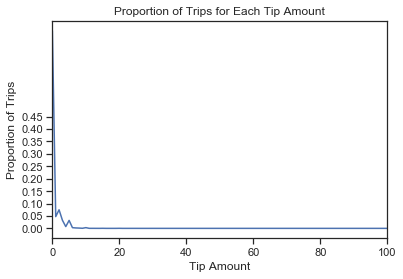

The average tip amount in Chicago is:  0.577273846336983


In [50]:
# Visualisation 
# pd.options.display.float_format = '{:,.1f}'.format
sns.set(style = "ticks")

prop_tips2.plot(kind = 'line',
                  x = prop_tips2.index,
                  y = prop_tips2.values
                )
plt.title('Proportion of Trips for Each Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Proportion of Trips')
plt.yticks(np.arange(0.000, 0.5, 0.05))
plt.show()

print('The average tip amount in Chicago is: ', relevant_chicago_df['Tip'].mean())

### 2.1 Whether the tip amount increases with trip distance.

In [51]:

tip_distance = relevant_chicago_df[['Tip Category','Distance Travelled']]
tg_groupby = tip_distance.groupby(['Distance Travelled','Tip Category'])
tg_groupby.size()

flatten_df = tg_groupby.size().reset_index()
flatten_df.columns = ['Distance Travelled', 'Tip Category', 'No. of Trips']
flatten_df

tip_distance_trips_pivot = pd.pivot_table(flatten_df, index=['Distance Travelled'], columns=['Tip Category'],
                                      values='No. of Trips', aggfunc=np.sum)
tip_distance_trips_pivot.reset_index(inplace=True)
tip_distance_trips_pivot.columns = ['Distance Travelled', 'With Tip', 'Without Tip']
tip_distance_trips_pivot

,Distance Travelled,With Tip,Without Tip
0,10,74986.0,292170.0
1,20,512.0,1782.0
2,30,42.0,108.0
3,40,2.0,9.0
4,50,3.0,5.0
5,60,NaN,3.0
6,70,NaN,1.0
7,90,2.0,1.0
8,100,NaN,1.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


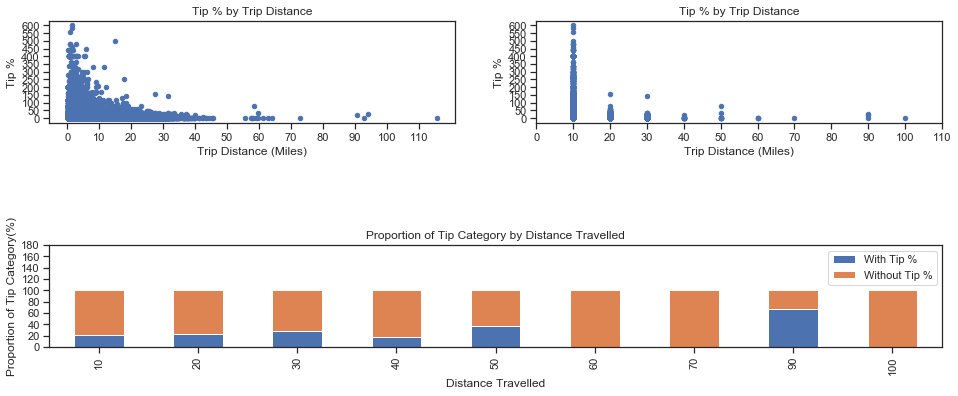

In [52]:

#Create 3 Series

#Series A:
size_overall_tip = relevant_chicago_df.groupby(['Distance Travelled'])

#Series B:
with_tip_df= relevant_chicago_df[relevant_chicago_df['Tip Category']  == 'With Tip']
gb_with_tip_df= with_tip_df.groupby('Distance Travelled')

#Series C:
without_df= relevant_chicago_df[relevant_chicago_df['Tip Category']  == 'Without Tip']
gb_without_df = without_df.groupby('Distance Travelled')

#Create new Dataframe:
trips_tip_distance_df = pd.DataFrame({'Total No. of Trips': size_overall_tip.size(), 'With Tip': gb_with_tip_df.size(), 
                               'Without Tip': gb_without_df.size()})

#Create 2 new columns
trips_tip_distance_df['With Tip %'] = (trips_tip_distance_df['With Tip'] /trips_tip_distance_df['Total No. of Trips'])*100
trips_tip_distance_df['Without Tip %'] = (trips_tip_distance_df['Without Tip'] /trips_tip_distance_df['Total No. of Trips'])*100
trips_tip_distance_df.head()

trips_tip_distance_df2=trips_tip_distance_df[['With Tip %', 'Without Tip %']]
trips_tip_distance_df2.head()


#plot tip vs trip distance

fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,1,2) 

relevant_chicago_df.plot(kind='scatter', x='Trip Miles', y='Tip %', title="Tip % by Trip Distance", ax=ax1)
ax1.set_xlabel('Trip Distance (Miles)')
ax1.set_ylabel('Tip %')
ax1.set_xticks(np.arange(0, 120,10))
ax1.set_yticks(np.arange(0, 650, 50))

relevant_chicago_df.plot(kind='scatter', x='Distance Travelled', y='Tip %', title="Tip % by Trip Distance", ax=ax2)
ax2.set_xlabel('Trip Distance (Intervals)')
ax2.set_ylabel('Tip %')
ax2.set_xticks(np.arange(0, 120,10))
ax2.set_yticks(np.arange(0, 650, 50))

#percentage of tippers vs non-tippers

trips_tip_distance_df2[['With Tip %','Without Tip %']].plot(kind='bar', stacked=True, 
                            legend=True, ax=ax3)
ax3.set_title('Proportion of Tip Category by Distance Travelled')
ax3.set_xlabel('Distance Travelled')
ax3.set_ylabel('Proportion of Tip Category(%)')
ax3.set_yticks(np.arange(0,200,20))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.2)
plt.show()

### 2.2 Whether the tip amount differs based on the pick-up time.

            With Tip %  Without Tip %
time_group                           
1               17.989         82.011
2               17.161         82.839
3               21.245         78.755
4               20.347         79.653
5               21.654         78.346


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


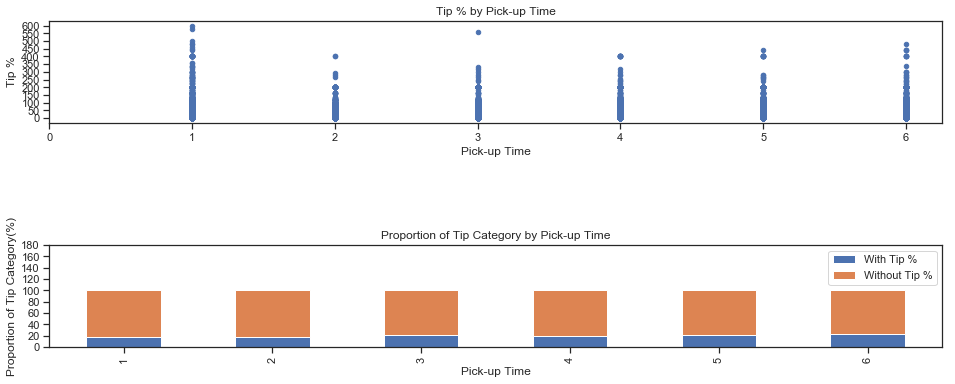

In [78]:

#Create 3 Series

#Series A:
size_overall_tip2 = relevant_chicago_df.groupby(['time_group'])

#Series B:
with_tip_df2= relevant_chicago_df[relevant_chicago_df['Tip Category']  == 'With Tip']
gb_with_tip_df2= with_tip_df2.groupby('time_group')

#Series C:
without_df2= relevant_chicago_df[relevant_chicago_df['Tip Category']  == 'Without Tip']
gb_without_df2 = without_df2.groupby('time_group')

#Create new Dataframe:
trips_tip_time_df = pd.DataFrame({'Total No. of Trips': size_overall_tip2.size(), 'With Tip': gb_with_tip_df2.size(), 
                               'Without Tip': gb_without_df2.size()})

#Create 2 new columns
trips_tip_time_df['With Tip %'] = (trips_tip_time_df['With Tip'] /trips_tip_time_df['Total No. of Trips'])*100
trips_tip_time_df['Without Tip %'] = (trips_tip_time_df['Without Tip'] /trips_tip_time_df['Total No. of Trips'])*100
trips_tip_time_df.head()

trips_tip_time_df2=trips_tip_time_df[['With Tip %', 'Without Tip %']]
print(trips_tip_time_df2.head())


#plot tip vs trip distance

fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

relevant_chicago_df.plot(kind='scatter', x='time_group', y='Tip %', title="Tip % by Pick-up Time", ax=ax1,)
ax1.set_xlabel('Pick-up Time')
ax1.set_ylabel('Tip %')
ax1.set_xticks(np.arange(0, 7))
ax1.set_yticks(np.arange(0, 650, 50))


#percentage of tippers vs non-tippers

trips_tip_time_df2[['With Tip %','Without Tip %']].plot(kind='bar', stacked=True, 
                            legend=True, ax=ax2)
ax2.set_title('Proportion of Tip Category by Pick-up Time')
ax2.set_xlabel('Pick-up Time')
ax2.set_ylabel('Proportion of Tip Category(%)')
ax2.set_yticks(np.arange(0,200,20))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.2)
plt.show()




### 2.3 Whether people in NYC tip better on Christmas than on New Year's.

In [82]:
tip_day2 = relevant_chicago_df[['Tip Category', 'trip_day']]
td_groupby2 = tip_day2.groupby(['trip_day','Tip Category'])
td_groupby2.size()

td_df2 = td_groupby2.size().reset_index()
td_df2.columns = ['trip_day', 'Tip Category', 'number_trips']
print(td_df2)

td_pivot2 = pd.pivot_table(td_df2, index=['trip_day'], columns=['Tip Category'],
                                      values='number_trips', aggfunc=np.sum)
td_pivot2.reset_index(inplace=True)
td_pivot2.columns = ['Trip Day', 'With Tip', 'Without Tip']
td_pivot2

td_gb_size2 = relevant_chicago_df.groupby(['trip_day']).size().reset_index()
td_gb_size2.columns = ['trip_day', 'total_trips']

td_pivot2['Total Trips'] = td_gb_size2['total_trips']
td_pivot2['With Tip %'] = (td_pivot2['With Tip']/td_pivot2['Total Trips'])*100
td_pivot2['Without Tip %'] = (td_pivot2['Without Tip']/td_pivot2['Total Trips'])*100

print(td_pivot2)

    trip_day Tip Category  number_trips
0  Christmas     With Tip         22153
1  Christmas  Without Tip         87565
2   New Year     With Tip         53394
3   New Year  Without Tip        206515
    Trip Day  With Tip  Without Tip  Total Trips  With Tip %  Without Tip %
0  Christmas     22153        87565       109718      20.191         79.809
1   New Year     53394       206515       259909      20.543         79.457


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


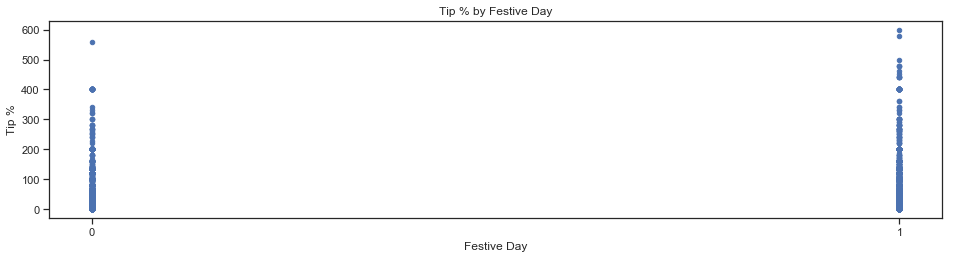

In [62]:
# visualise 

relevant_chicago_df['trip_day_int'] = relevant_chicago_df['trip_day'].map({'Christmas': 0, 'New Year': 1})
relevant_chicago_df.head(5)

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(2,1,1)
# tip% by Day 
relevant_chicago_df.plot(kind='scatter', x='trip_day_int', y='Tip %', ax=ax1,)
ax1.set(xlabel= 'Festive Day', ylabel='Tip %', title= 'Tip % by Festive Day')
ax1.set_xticks(np.arange(0, 2))
plt.show()

### 2.4 Applying linear regression to identify patterns

In [91]:
#Linear Regression

distance_regr = linear_model.LinearRegression()
X = relevant_chicago_df[['Trip Miles']]
y = relevant_chicago_df[['Tip %']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
distance_regr.fit(X_train, y_train)

print('Tip percentage = ', distance_regr.intercept_,'+', distance_regr.coef_,'* Distance' )

distance_regr.predict(y_test)

fitted_values = distance_regr.predict(X_test)

print(r2_score(y_test, fitted_values))

Tip percentage =  [8.96618828] + [[-0.37704069]] * Distance
0.00664452194269316


## <u>Comparison Between New York and Chicago</u>

### To calculate proportion of tips (with or without) grouped by distance intervals: 

In [87]:
trips_tip_distance_chicago = pd.DataFrame({'Chicago_With Tip %': trips_tip_distance_df['With Tip %'], 
                                           'Chicago_Without Tip %': trips_tip_distance_df['Without Tip %']})

trips_tip_distance_chicago.reset_index(inplace=True)
trips_tip_distance_chicago.columns = ['Distance Travelled', 'Chicago_With Tip %', 'Chicago_Without Tip %']
trips_tip_distance_chicago

trips_tip_distance_nyc = pd.DataFrame({'Distance Travelled': tdt_pivot['Distance Travelled'],'NYC_With Tip %': tdt_pivot['With Tip %'], 
                                           'NYC_Without Tip %': tdt_pivot['Without Tip %']})
trips_tip_distance_nyc


all_trips_tip_distance_df = pd.merge(trips_tip_distance_chicago,trips_tip_distance_nyc, on= 'Distance Travelled')
print(all_trips_tip_distance_df)


   Distance Travelled  Chicago_With Tip %  Chicago_Without Tip %  \
0                  10              20.423                 79.577   
1                  20              22.319                 77.681   
2                  30              28.000                 72.000   
3                  40              18.182                 81.818   
4                  50              37.500                 62.500   
5                  60                 NaN                100.000   
6                  70                 NaN                100.000   

   NYC_With Tip %  NYC_Without Tip %  
0          55.009             44.991  
1          55.348             44.652  
2          41.667             58.333  
3          28.205             71.795  
4          42.857             57.143  
5          33.333             66.667  
6         100.000                NaN  


### To calculate proportion of tips (with or without) grouped by time intervals: 

In [88]:

trips_tip_time_chicago = pd.DataFrame({'Chicago_With Tip %': trips_tip_time_df['With Tip %'], 
                                           'Chicago_Without Tip %': trips_tip_time_df['Without Tip %']})

trips_tip_time_chicago.reset_index(inplace=True)
trips_tip_time_chicago.columns = ['Pick-up Time', 'Chicago_With Tip %', 'Chicago_Without Tip %']
trips_tip_time_chicago

trips_tip_time_nyc = pd.DataFrame({'Pick-up Time': tt_pivot['Time Interval'],'NYC_With Tip %': tt_pivot['With Tip %'], 
                                           'NYC_Without Tip %': tt_pivot['Without Tip %']})
trips_tip_time_nyc


all_trips_tip_time_df = pd.merge(trips_tip_time_chicago,trips_tip_time_nyc, on= 'Pick-up Time')
print(all_trips_tip_time_df)


   Pick-up Time  Chicago_With Tip %  Chicago_Without Tip %  NYC_With Tip %  \
0             1              17.989                 82.011          52.056   
1             2              17.161                 82.839          53.026   
2             3              21.245                 78.755          55.886   
3             4              20.347                 79.653          55.017   
4             5              21.654                 78.346          55.866   
5             6              23.503                 76.497          54.722   

   NYC_Without Tip %  
0             47.944  
1             46.974  
2             44.114  
3             44.983  
4             44.134  
5             45.278  


### To calculate proportion of tips (with or without) grouped by festive day: 

In [90]:
trips_tip_day_chicago = pd.DataFrame({'Festive Day': td_pivot2['Trip Day'],'Chicago_With Tip %': td_pivot2['With Tip %'], 
                                           'Chicago_Without Tip %': td_pivot2['Without Tip %']})
trips_tip_day_chicago

trips_tip_day_nyc = pd.DataFrame({'Festive Day': td_pivot['Trip Day'],'NYC_With Tip %': td_pivot['With Tip %'], 
                                           'NYC_Without Tip %': td_pivot['Without Tip %']})
trips_tip_day_nyc


all_trips_tip_day_df = pd.merge(trips_tip_day_chicago,trips_tip_day_nyc, on= 'Festive Day')
print(all_trips_tip_day_df)



  Festive Day  Chicago_With Tip %  Chicago_Without Tip %  NYC_With Tip %  \
0   Christmas              20.191                 79.809          53.093   
1    New Year              20.543                 79.457          57.845   

   NYC_Without Tip %  
0             46.907  
1             42.155  


## Insights

We uncovered THREE main insights:
- First, we were wrong in hypothesising that the longer the distance travelled, more likely that the tip (as a percent of the total fare)  would be higher. The data suggests that as the distance travelled increases, the percentage of tip decreases. This is consistent across both the cities. In terms of the act of tipping, it was noticeable that New York taxi riders would tend to give tips even for short distance travel as compared to Chicago taxi riders.
- Second, tips (as a percent of the fare) in New York and Chicago tended to be higher between 4pm to midnight. In particular, majority of Chicago riders did not give any tip at all especially during the early part of the day.
- Finally, as between New Year's and Christmas, the tips (as a percent of the fare) in both cities tended to be slightly higher on New Year's than on Christmas. 

Simple Linear Regression:

In order to determine to what extent the distance travelled impacts the percentage of tip given to taxi drivers, a Simple Linear Regression was conducted for both datasets. The results are as follow:

(Chicago)Tip percentage =  [8.96618828] + [[-0.37704069]] * Distance
(R2=0.00664452194269316)
A "mile" increase in distance travelled is associated with a 0.37704069 "percentage" decrease in Tip.


(New York)Tip percentage =  [13.79339662] + [[-0.21699095]] * Distance
(R2=0.002399528026094222)
A "mile" increase in distance travelled is associated with a 0.21699095 "percentage" decrease in Tip.


## Evaluation 

<h4><b>Factors affecting tips relative to the fare amount</b></h4>
We were intrigued by some instances where the tips exceeded the fare amount in both Chicago and New York for trips of a short distance. It would be interesting to investigate the underlying factors that contribute to such generous tipping. 

<h4><b>Simple linear regression models</b></h4>
The coefficient of determination (𝑅2) for both the simple linear regression models suggest that the model might not be able to explain the variation of the output with different inputs. Further cross-validation could be done in order to obatin a more reliable model.